In [365]:
# импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

# Экспоненциальное распределение

Сгенерируем выборку объема 1000 из экспоненциального распределения с показателем $\lambda = 0.8$

In [379]:
# зададим параметр экспоненциального распределения и сгенерируем выборку из 1000 элементов
exp_lambda = 0.8
rvsample = sts.expon(scale=1./exp_lambda)
sample = rvsample.rvs(1000)

Гистограмма для полученной выборки и функция распределения:

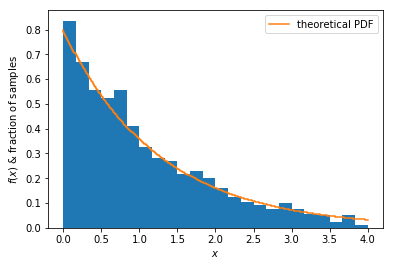

In [380]:
# нарисуем гистограмму по полученной выборке и наложим на нее график функции плотности распределения
x = np.linspace(0.,4.,300)
pdf = rvsample.pdf(x)
plt.hist(sample, 24, range=(0.,4.), normed = True)
plt.step(x, pdf, label='theoretical PDF')
plt.ylabel('$f(x)$ & fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='upper right')
plt.show()

# Оценка выборочного среднего

Поскольку матожидание экспоненциального распределения есть $\lambda^{-1}$, а дисперсия $\lambda^{-2}$, то, по ЦПТ, параметры нормального распределения, аппроксимирующего выборочное среднее, будут $\mu=\lambda^{-1}$ и $\sigma^2=\frac{\lambda^{-2}}{n}$.

Построим гистограммы распределений выборочного среднего для выборок объемом 5, 10, 25, 50, 100, 200.

In [385]:
# сначала определим процедуру отрисовки гистограммы и графика для произвольного n
def show_distribution(n):
    M = list()
    for i in range(1000):
        # генерируем выборку случайной величины объема n
        sample = rvsample.rvs(n)
        # считаем ее среднее
        E = sum(sample)/n
        # добавляем к массиву средних
        M.append(E)
    # получен массив средних - выборка средних объема 1000
    # изобразим ее в виде гистограммы
    plt.hist(M, 40, range=(0.,2.5), normed = True)
    plt.ylabel('statistic vs normal distribution')
    plt.xlabel('$x$')
    plt.legend(loc='upper right')
    # теперь возьмем нормальное распределение с параметрами, соответствующими выборке объема n по ЦПТ
    norm_rv = sts.norm(exp_lambda**(-1), math.sqrt(exp_lambda**(-2)/n) )
    # построим график плотности этого распределения поверх гистограммы
    x = np.linspace(0.,2.5,300)
    pdf1 = norm_rv.pdf(x)
    plt.step(x, pdf1, label='theoretical PDF')
    plt.show()        

Теперь построим графики для n = 5, 10, 25, 50, 100, 200.

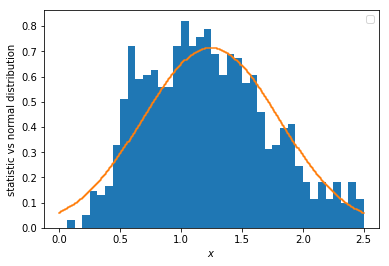

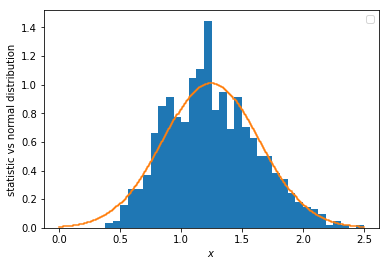

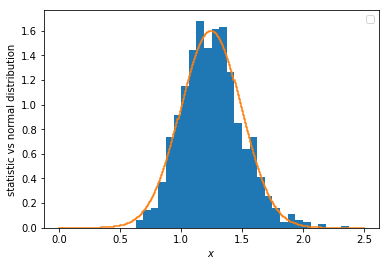

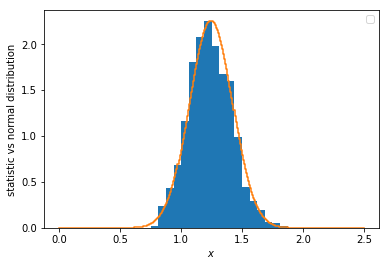

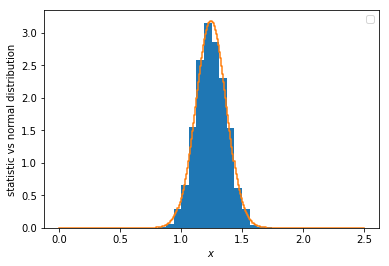

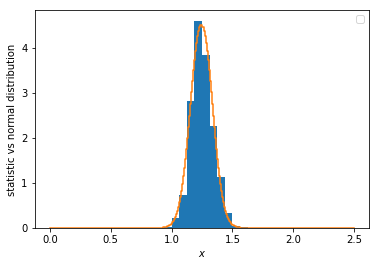

In [386]:
# с помощью созданной процедуры построим графики для выборок различного объема
for n in [5, 10, 25, 50, 100, 200] :
    show_distribution(n)

Видно, что с ростом n выборочное среднее приближается к матожиданию экспоненциального распределения $\frac{1}{\lambda}=1.25$, а разброс выборочных средних убывает.

Соответственно, распределение выборочных средних с ростом n все точнее описывается нормальным распределением по ЦПТ.